In [1]:
import os
import pandas as pd
import sys
from sklearn.metrics import mean_squared_error, mean_absolute_error
sys.path.append('../scripts')
combined_df = pd.read_pickle('../scripts/data/combined_df_engineered.pickle')
from LSTM_Encoder_Decoder import make_test
import matplotlib.pyplot as plt
import random_forest
from sklearn.externals import joblib

def test_nn(model_name, sequence_len,dataset):
    test_df = dataset[-(24*10*7):]
    columns_to_drop = [x for x in test_df.columns if 'Spot' and 'T-' in x and int(x.split('-')[1]) < sequence_len]
    test_df.drop(columns=columns_to_drop,inplace=True)
    test_result_df = make_test(test_df,model_name,sequence_len)
    fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 6))
    test_result_df.plot(ax=axes)
    axes.set_title(label=f"MAE {mean_absolute_error(test_result_df['Actuals'],test_result_df['Predictions'])}")
    #plt.show()

# Models and parameters ordered by lowest MAE

In [14]:
results_df = pd.read_csv('../scripts/LSTM_test_results.csv')
results_df.sort_values(by='MAE')

,Model Name,First Neurons,Second Neurons,Dense Neurons,Learning Rate,Optimizer,Epochs,Batch Size,Sequence Length,MAE,RMSE
48,LSTM_encdec_L1L2_datasetcombined_df_stripped2....,100,100,50,1e-05,<tensorflow.python.keras.optimizers.Adam objec...,50,12,24,4.647721,6.627999
52,LSTM_encdec_L1L2_datasetcombined_df_stripped.p...,100,100,50,1e-05,<tensorflow.python.keras.optimizers.Adam objec...,50,6,24,4.794718,6.720844
39,LSTM_encdec_dropout_datasetcombined_df_strippe...,100,100,50,0.0001,<tensorflow.python.keras.optimizers.Adam objec...,30,1,24,4.802444,6.824766
27,LSTM_encdec_datasetcombined_df_stripped.pickle...,50,50,25,0.001,<tensorflow.python.keras.optimizers.Adam objec...,20,8,24,4.829977,6.431156
46,LSTM_encdec_L1L2_datasetcombined_df_stripped.p...,100,100,50,1e-05,<tensorflow.python.keras.optimizers.Adam objec...,50,12,24,4.939348,6.890013
51,LSTM_encdec_L1L2_datasetcombined_df_stripped.p...,100,100,50,1e-05,<tensorflow.python.keras.optimizers.Adam objec...,50,1,24,5.209378,6.795641
50,LSTM_encdec_L1L2_datasetcombined_df_perm_strip...,100,100,50,1e-05,<tensorflow.python.keras.optimizers.Adam objec...,50,12,24,5.213904,6.958819
34,LSTM_encdec_datasetcombined_df_stripped2.pickl...,50,50,25,0.001,<tensorflow.python.keras.optimizers.Adam objec...,20,8,24,5.548080,7.101172
10,LSTM_encoder_decoder_sequence24-1551958606.h5,50,50,25,0.001,<tensorflow.python.keras.optimizers.Adam objec...,30,4,24,5.744686,7.516717
53,LSTM_encdec_L1L2_datasetcombined_df_stripped.p...,100,100,50,1e-06,<tensorflow.python.keras.optimizers.Adam objec...,100,12,24,5.786677,7.625315


# LSTM
## 1 Week Sequence
So far the best LSTM model that was tested was a network trained with parameters listed below. These models have a sequence length of 168 hours, which mean they predict a week at a time The LSTM below is a large network. Second neural net is much smaller than the one above, yet is slightly better because it reacts more to fluctuations in the spot price.

Used dataset: combined_df_engineered.pickle

Text(0.5, 1.0, 'MAE 21.32')

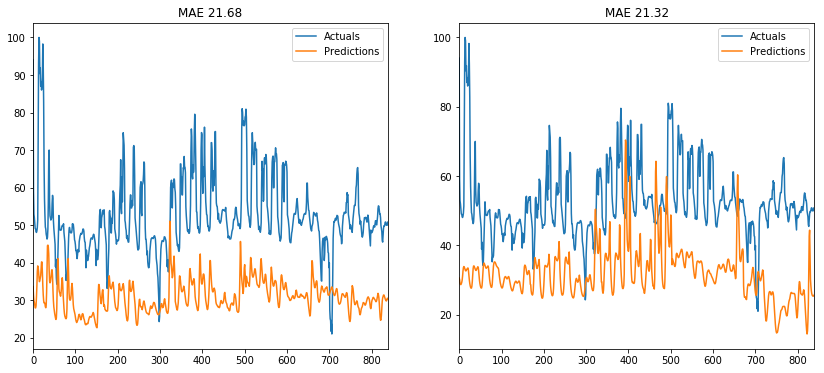

In [2]:
model_names = ['LSTM_encoder_decoder_sequence168-1551890848.h5','LSTM_encoder_decoder_sequence168-1551954932.h5']
test_result_df = make_test(combined_df[-(168*10):],model_names[0],24*7)
test_result_df2 = make_test(combined_df[-(168*10):].drop(columns=combined_df.columns[27:76]),model_names[1],24*7)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14, 6))
test_result_df.plot(ax=axes[0])
axes[0].set_title(label=f"MAE {mean_absolute_error(test_result_df['Actuals'],test_result_df['Predictions']):.2f}")
test_result_df2.plot(ax=axes[1])
axes[1].set_title(label=f"MAE {mean_absolute_error(test_result_df2['Actuals'],test_result_df2['Predictions']):.2f}")
plt.show()

## Two more hidden layers
Didn't affect the model performance much.

Text(0.5, 1.0, 'MAE 21.48')

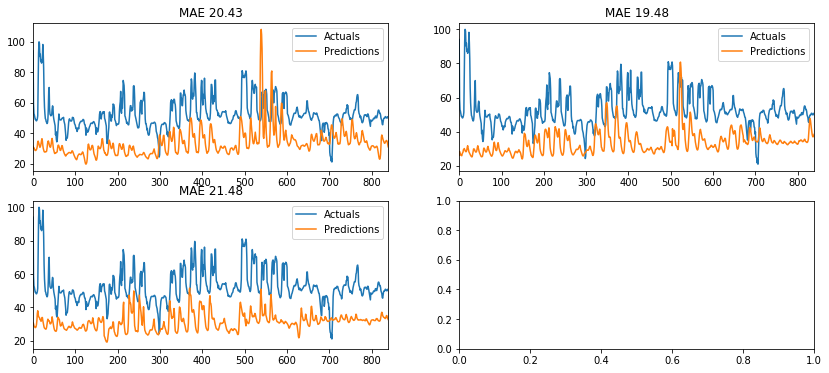

In [3]:
model_names=['LSTM_encoder_decoder_sequence168-1551978241.h5','LSTM_encoder_decoder_sequence168-1552010356.h5','LSTM_encoder_decoder_sequence168-1552023571.h5']
test_result_df1 = make_test(combined_df[-(168*10):].drop(columns=combined_df.columns[27:76]),model_names[0],24*7)
test_result_df2 = make_test(combined_df[-(168*10):].drop(columns=combined_df.columns[27:76]),model_names[1],24*7)
test_result_df3 = make_test(combined_df[-(168*10):].drop(columns=combined_df.columns[27:76]),model_names[2],24*7)
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14, 6))
test_result_df1.plot(ax=axes[0,0])
axes[0,0].set_title(label=f"MAE {mean_absolute_error(test_result_df1['Actuals'],test_result_df1['Predictions']):.2f}")
test_result_df2.plot(ax=axes[0,1])
axes[0,1].set_title(label=f"MAE {mean_absolute_error(test_result_df2['Actuals'],test_result_df2['Predictions']):.2f}")
test_result_df3.plot(ax=axes[1,0])
axes[1,0].set_title(label=f"MAE {mean_absolute_error(test_result_df3['Actuals'],test_result_df3['Predictions']):.2f}")
plt.show()

## 24 hour sequence
Predicting the next 24 hours. Below is a small network just like the one above. Second is smaller batch size, still a small network

Text(0.5, 1.0, 'MAE 19.81')

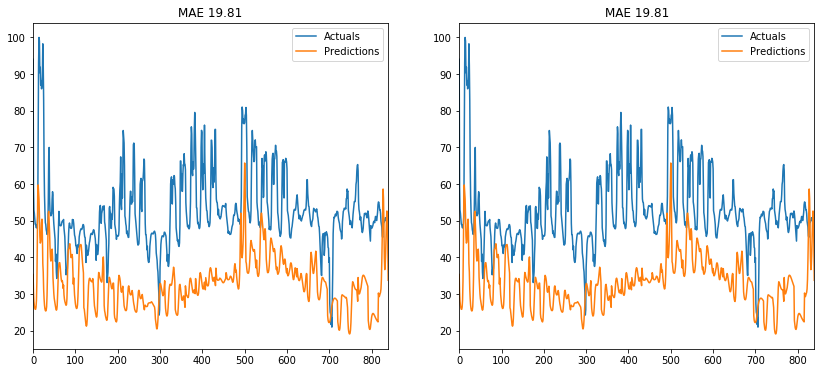

In [6]:
model_names = ['LSTM_encoder_decoder_sequence24-1551955984.h5','LSTM_encoder_decoder_sequence24-1551958606.h5']
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
test_result_df1 = make_test(combined_df[-(24*10*7):].drop(columns=combined_df.columns[27:76]),model_names[0],24)
test_result_df1.plot(ax=axes[0])
axes[0].set_title(label=f"MAE {mean_absolute_error(test_result_df1['Actuals'],test_result_df1['Predictions']):.2f}")
test_result_df2 = make_test(combined_df[-(24*10*7):].drop(columns=combined_df.columns[27:76]),model_names[0],24)
test_result_df2.plot(ax=axes[1])
axes[1].set_title(label=f"MAE {mean_absolute_error(test_result_df2['Actuals'],test_result_df2['Predictions']):.2f}")
plt.show()

## 48 hour sequence
Predicting the next 48 hours.

Text(0.5, 1.0, 'MAE 22.341711793426015')

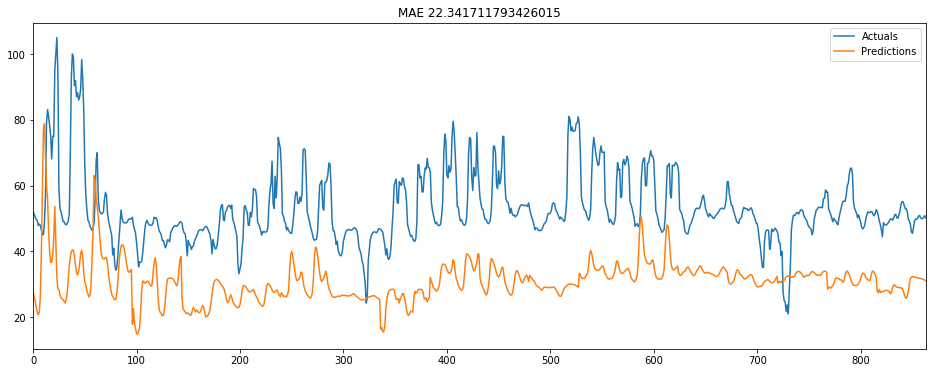

In [12]:
model_name = 'LSTM_encoder_decoder_sequence48-1551966013.h5'
test_result_df = make_test(combined_df[-(24*10*7):].drop(columns=combined_df.columns[27:76]),model_name,24*2)
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 6))
test_result_df.plot(ax=axes)
axes.set_title(label=f"MAE {mean_absolute_error(test_result_df['Actuals'],test_result_df['Predictions'])}")
plt.show()

## Same network, different sequence lengths. 
New feature engineered dataset: combined_df_engineered_T-24.pickle

In [2]:
combined_df = pd.read_pickle('combined_df_engineered_T-24.pickle')

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


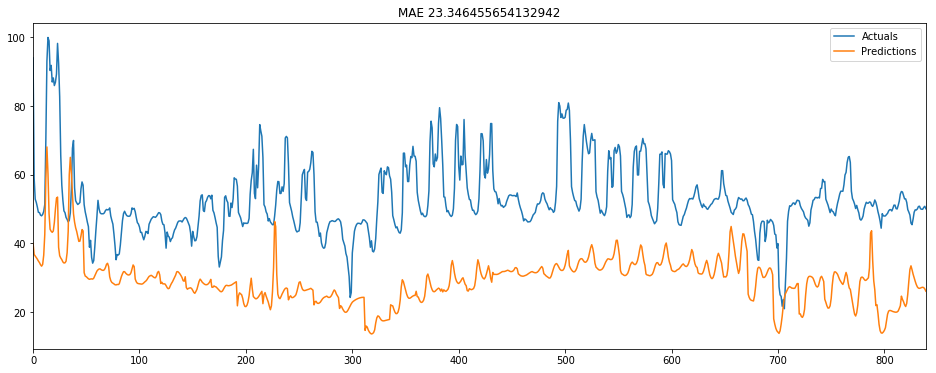

In [14]:
test_nn('LSTM_encdec_datasetcombined_df_engineered_T-24.pickle_sequence24-1552390862.h5',24,combined_df)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


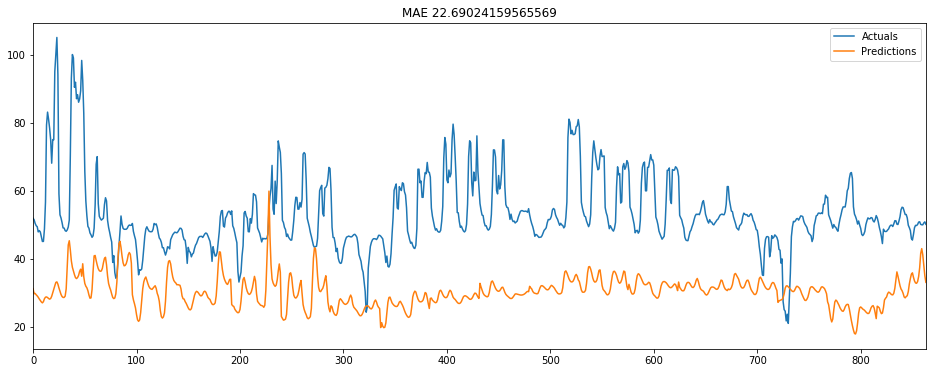

In [15]:
test_nn('LSTM_encdec_datasetcombined_df_engineered_T-24.pickle_sequence48-1552391787.h5',24*2,combined_df)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


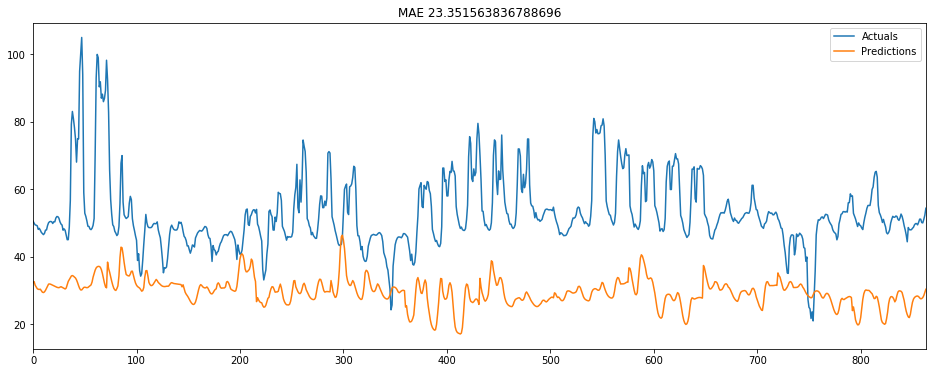

In [16]:
test_nn('LSTM_encdec_datasetcombined_df_engineered_T-24.pickle_sequence72-1552392857.h5',24*3,combined_df)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


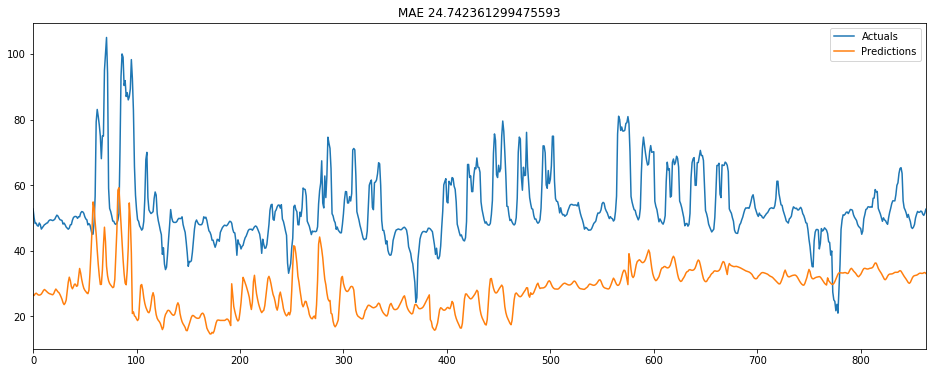

In [17]:
test_nn('LSTM_encdec_datasetcombined_df_engineered_T-24.pickle_sequence96-1552394120.h5',24*4,combined_df)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


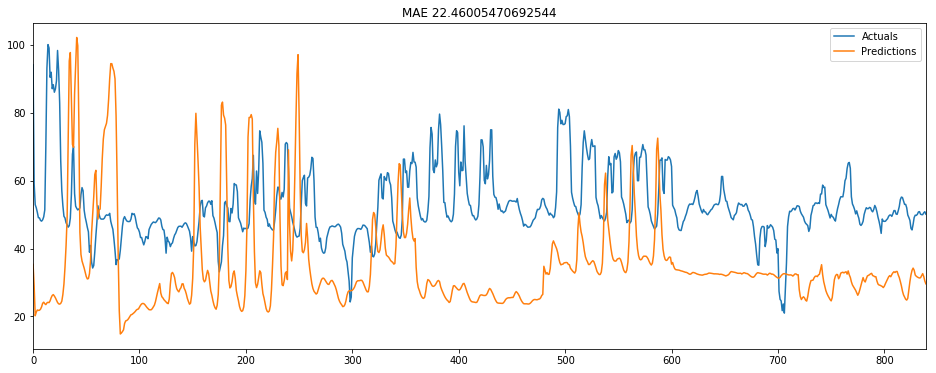

In [18]:
test_nn('LSTM_encdec_datasetcombined_df_engineered_T-24.pickle_sequence120-1552395539.h5',24*5,combined_df)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


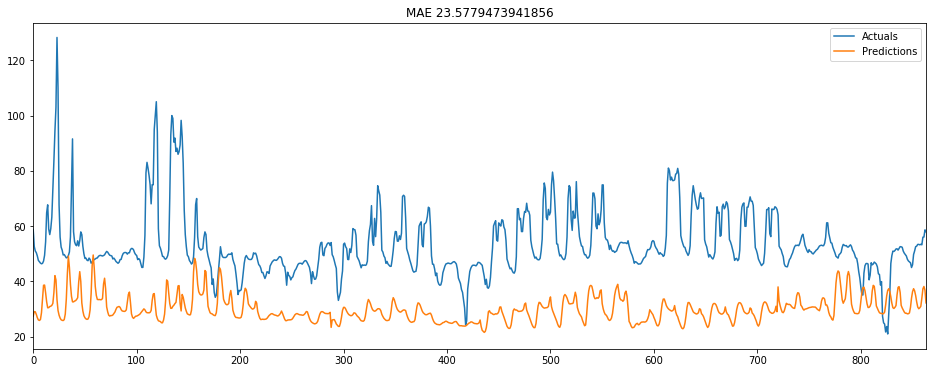

In [20]:
test_nn('LSTM_encdec_datasetcombined_df_engineered_T-24.pickle_sequence144-1552397095.h5',24*6,combined_df)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


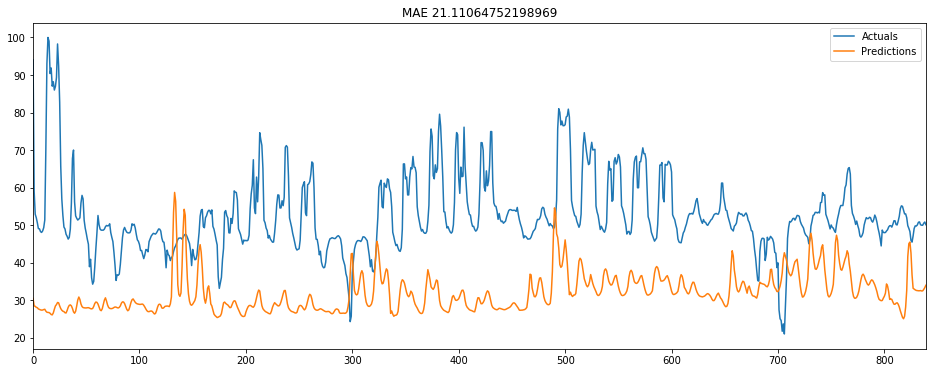

In [21]:
test_nn('LSTM_encdec_datasetcombined_df_engineered_T-24.pickle_sequence168-1552398793.h5',24*7,combined_df)

## Removing features
Based on random forest sklearn's importance function

In [18]:
var_dict = {}
with open('data/importances.txt','r') as f:
    for line in f:
        list_line = line.split()
        variable_list = []
        importance = 0
        for i in range(0,len(list_line)):
            if 'Importance' not in list_line[i]:
                variable_list.append(list_line[i] + ' ')
            else:
                importance = float(list_line[-1])
                break
        variable_str = ''.join(variable_list[1:])
        var_dict[variable_str] = importance
#lol = filter(lambda x: x.values() > 0, var_dict)
#list(lol)
columns_to_drop = []
for var in var_dict.items():
    if var[1] < 0.01:
        columns_to_drop.append(var[0].rstrip())
print(combined_df.columns)
columns_to_drop
combined_df['hour_time'] = combined_df['hour_sin_time'] * combined_df['hour_cos_time']
combined_df['weekday_time'] = combined_df['weekday_sin_time'] * combined_df['weekday_cos_time']
combined_df['month_time'] = combined_df['month_sin_time'] * combined_df['month_cos_time']
combined_df['day_time'] = combined_df['day_sin_time'] * combined_df['day_cos_time']
combined_df_stripped = combined_df.drop(columns=columns_to_drop)
combined_df_stripped.to_pickle('combined_df_stripped2.pickle')

Index(['Spot', 'Helsinki Temperature', 'Jyvaskyla Temperature',
       'Rovaniemi Temperature', 'Consumption', 'Nuclear Power Production FI',
       'Wind Power Production FI', 'FI-EE', 'FI-NO', 'FI-RU',
       ...
       'Spot T-696', 'Spot MA T-696', 'Spot STD T-696',
       'Spot Rolling Min T-696', 'Spot Rolling Max T-696', 'Spot T-720',
       'Spot MA T-720', 'Spot STD T-720', 'Spot Rolling Min T-720',
       'Spot Rolling Max T-720'],
      dtype='object', length=204)


## Same network, different sequence lengths. Different dataset
Now with the stripped version of the dataset, that has less features

In [3]:
combined_df_stripped = pd.read_pickle('combined_df_stripped.pickle')

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


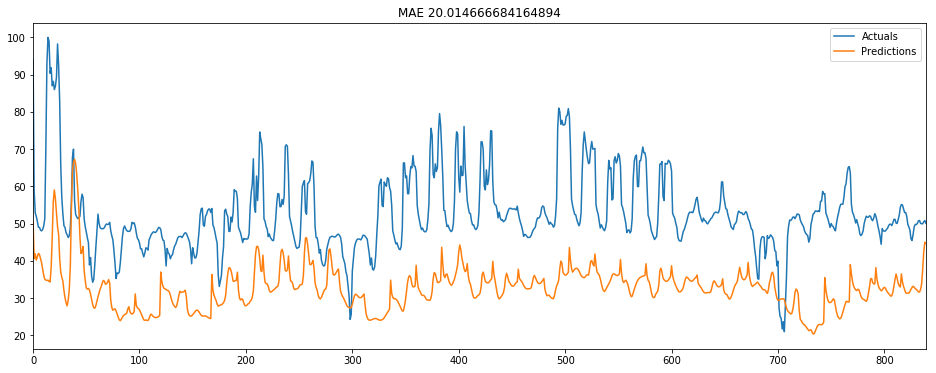

In [7]:
test_nn('LSTM_encdec_datasetcombined_df_stripped.pickle_sequence24-1552640778.h5',24,combined_df_stripped)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


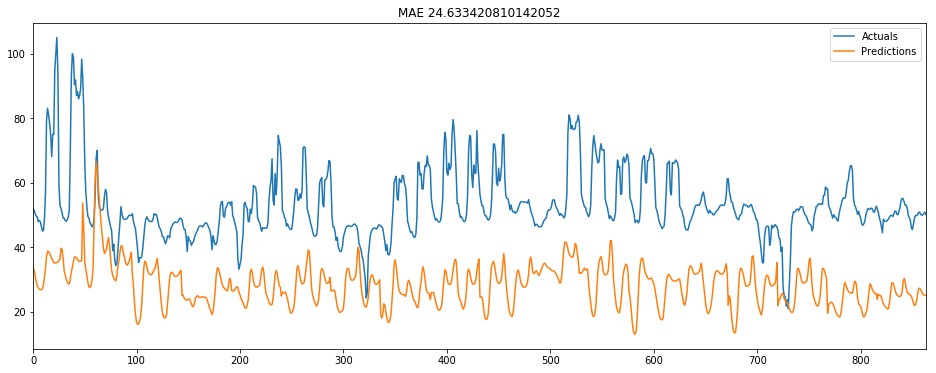

In [8]:
test_nn('LSTM_encdec_datasetcombined_df_stripped.pickle_sequence48-1552641675.h5',24*2,combined_df_stripped)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


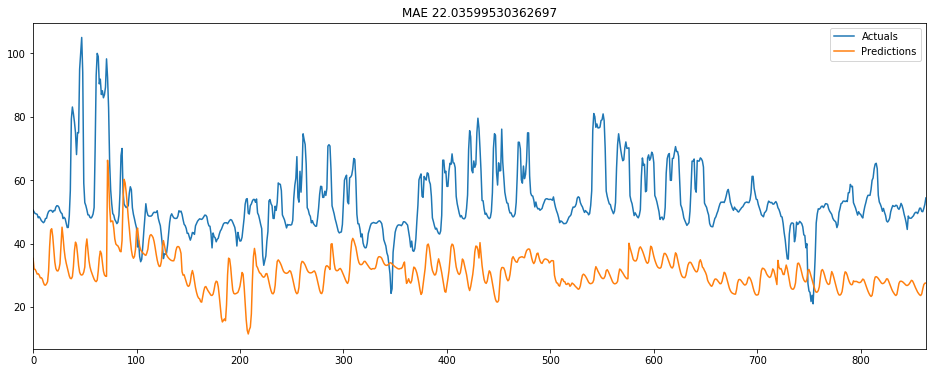

In [9]:
test_nn('LSTM_encdec_datasetcombined_df_stripped.pickle_sequence72-1552642702.h5',24*3,combined_df_stripped)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


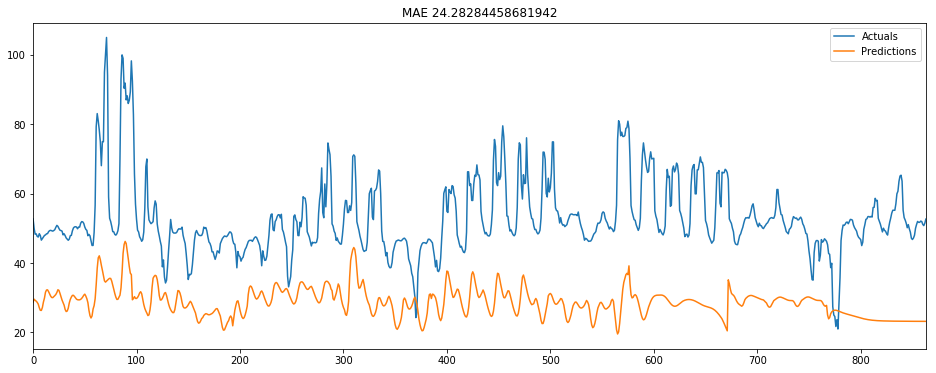

In [10]:
test_nn('LSTM_encdec_datasetcombined_df_stripped.pickle_sequence96-1552643892.h5',24*4,combined_df_stripped)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


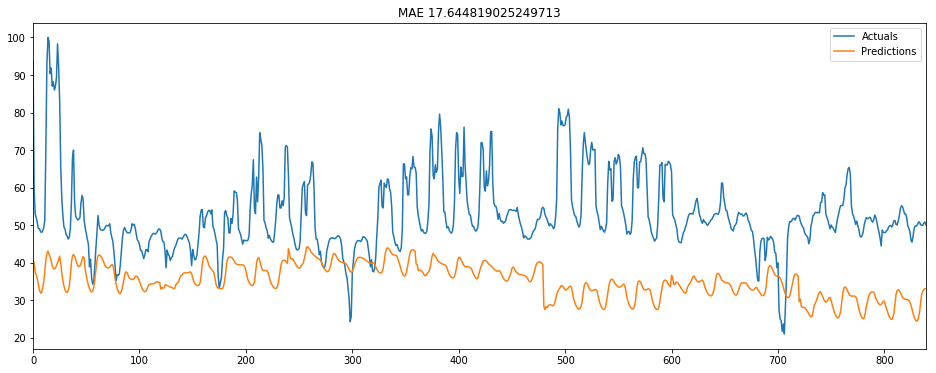

In [11]:
test_nn('LSTM_encdec_datasetcombined_df_stripped.pickle_sequence120-1552645184.h5',24*5,combined_df_stripped)

## A dataset with cyclical time and other unimportant features stripped

In [4]:
combined_df_stripped2 = pd.read_pickle('combined_df_stripped2.pickle')

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


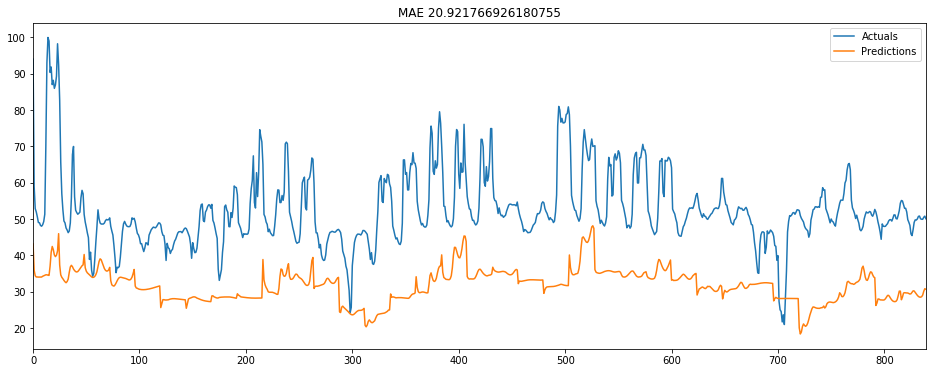

In [5]:
test_nn('LSTM_encdec_datasetcombined_df_stripped2.pickle_sequence24-1552650402.h5',24,combined_df_stripped2)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


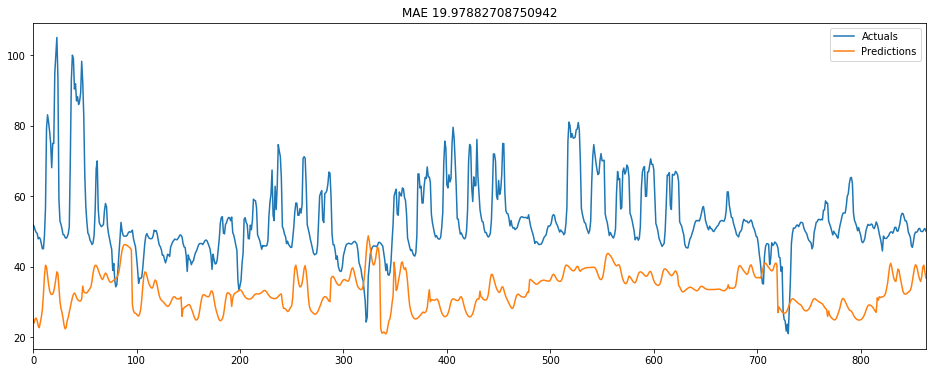

In [6]:
test_nn('LSTM_encdec_datasetcombined_df_stripped2.pickle_sequence48-1552651343.h5',24*2,combined_df_stripped2)

# Input weight regularization
L1L2-regularization where l1=0.01 and l2=0.01.
The first creates waves similar to daily change in price, but does identify the two different spikes during the day. The model is able to get a pretty low error nonetheless. The first model had a learning rate of 0.0001 and the others had 0.001, model was trained on 30 epochs. All other models except the 0.0001 learning rate one completely flatlined, like in the second graph.

To further determine if a lower learning rate would reduce losses, the third graph is a model with 0.00001 learning rate at 30 epochs. This model

In [3]:
data = pd.read_pickle('combined_df_stripped.pickle')

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


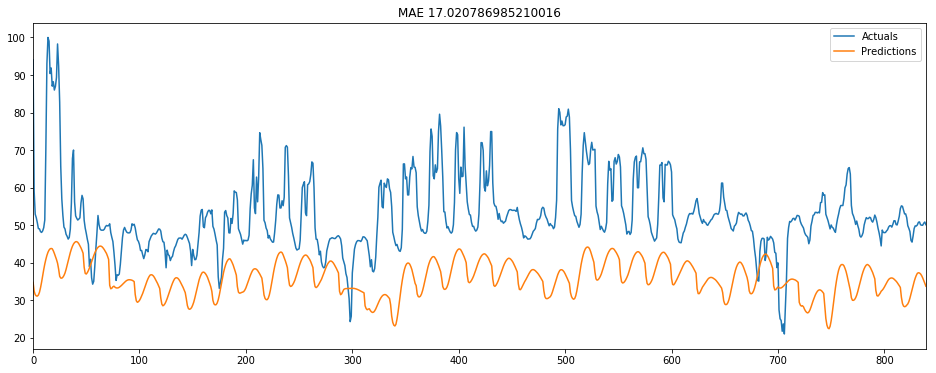

In [4]:
test_nn('LSTM_encdec_L1L2_datasetcombined_df_stripped.pickle_sequence24-1552913805.h5',24,data)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


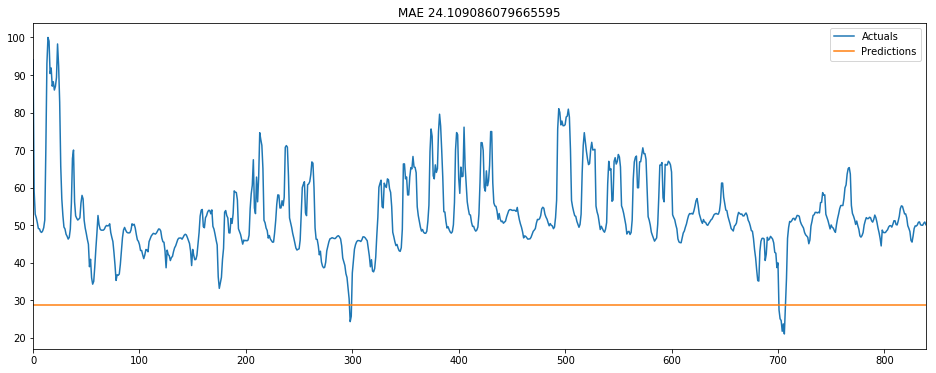

In [8]:
test_nn('LSTM_encdec_L1L2_datasetcombined_df_stripped.pickle_sequence24-1552951238.h5',24,data)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


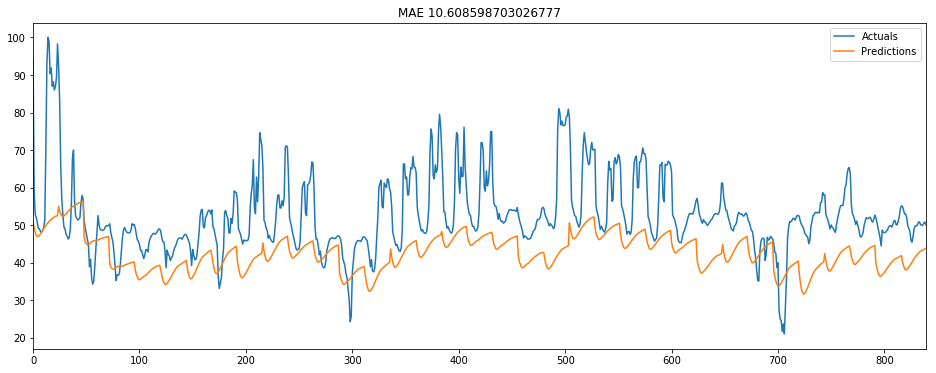

In [4]:
test_nn('LSTM_encdec_L1L2_datasetcombined_df_stripped.pickle_sequence24-1552981423.h5',24,data)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


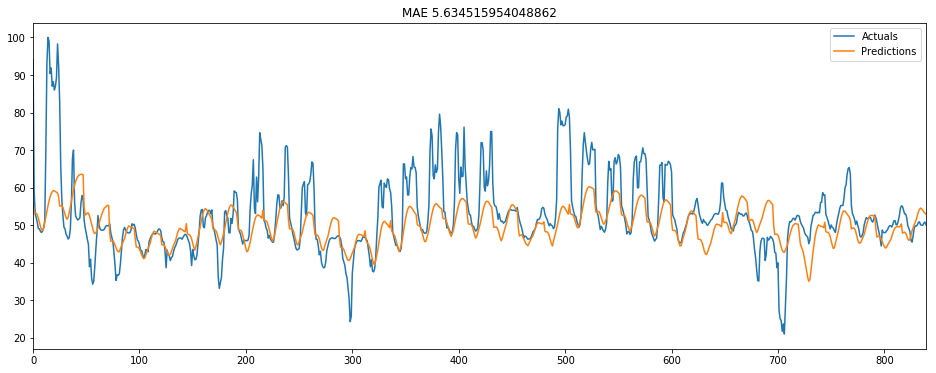

In [5]:
test_nn('LSTM_encdec_L1L2_datasetcombined_df_stripped.pickle_sequence24-1552984831.h5',24,data)
plt.show()

# Comparing dataset performance with low learning rate and Input Weight Regularization
Now we have confirmed that low learning rate and input weight regularization reduces loss the most. Let's test different datasets with low learning rates to find the best one. The one with all the features still doesn't perform well, best performing dataset is the "combined_df_stripped.pickle"

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


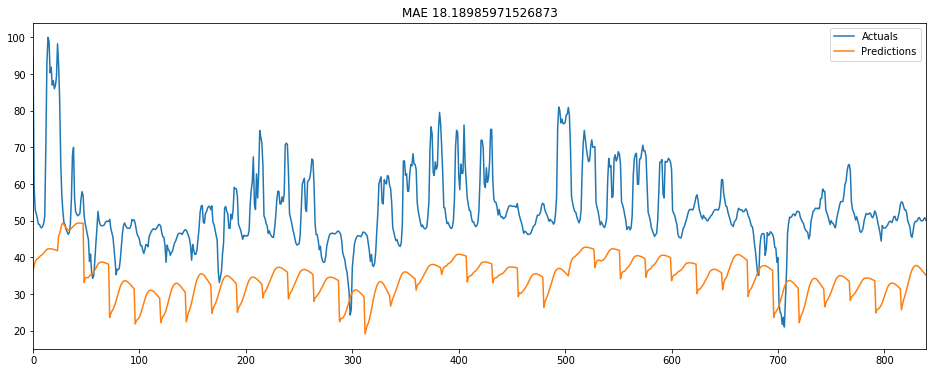

In [5]:
# dataset with all features
test_nn('LSTM_encdec_L1L2_datasetcombined_df_engineered_T-24.pickle_sequence24-1552993933.h5',24,combined_df)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


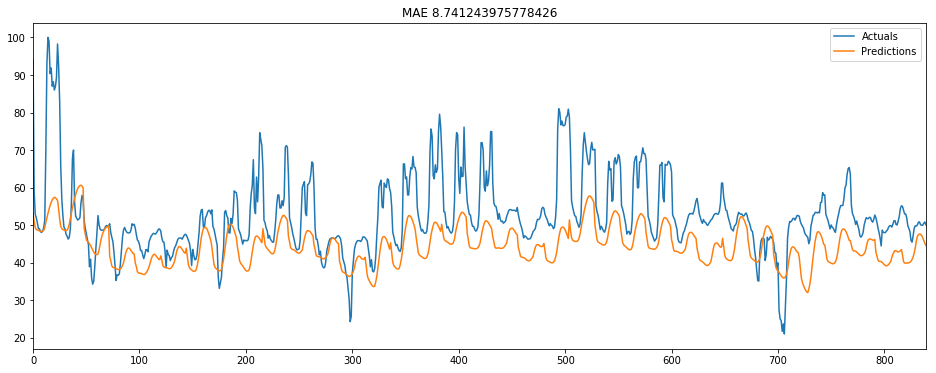

In [4]:
# stripped dataset with cyclical time
combined_df_stripped2 = pd.read_pickle('combined_df_stripped2.pickle')
test_nn('LSTM_encdec_L1L2_datasetcombined_df_stripped2.pickle_sequence24-1552996095.h5',24,combined_df_stripped2)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


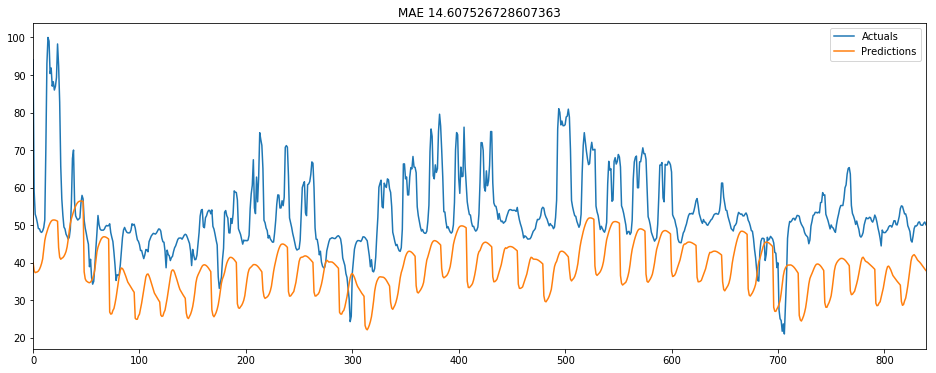

In [12]:
# dataset stripped with permutative importances (130 features still left)
combined_df_perm_stripped = pd.read_pickle('combined_df_perm_stripped.pickle')
test_nn('LSTM_encdec_L1L2_datasetcombined_df_perm_stripped.pickle_sequence24-1552998290.h5',24,combined_df_perm_stripped)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


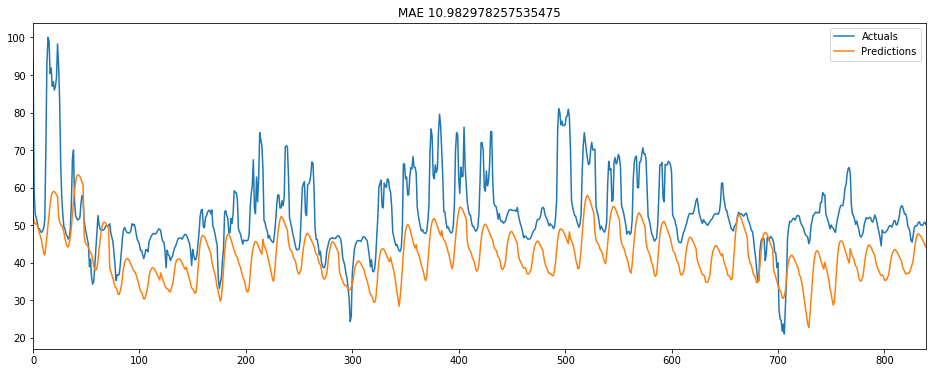

In [3]:
# stripped features with gini importance but with cyclical time
combined_df_perm_stripped2 = pd.read_pickle('combined_df_perm_stripped2.pickle')
test_nn('LSTM_encdec_L1L2_datasetcombined_df_perm_stripped2.pickle_sequence24-1553001343.h5',24,combined_df_perm_stripped2)

# Testing hyperparameters on the best performing dataset
Lowering the learning rate even more, trying different batch sizes. We are keeping the L1L2 regularizers, we will add dropout and other regularizers also. Testing the new hyperparameters on different sequence lengths to see how the forecasts perform in the future. 

Increasing sequence length with these parameters causes poor accuracy, a higher learning rate may be needed for higher sequence lengths.

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


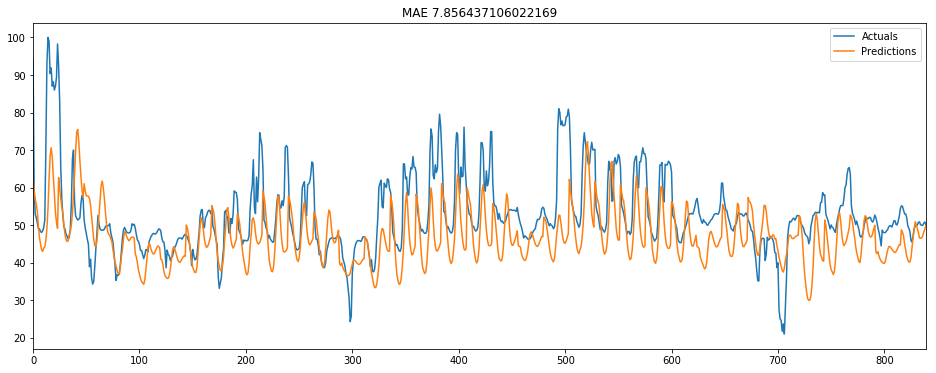

In [4]:
# batch size 1, epochs 50
combined_df_stripped = pd.read_pickle('combined_df_stripped.pickle')
test_nn('LSTM_encdec_L1L2_datasetcombined_df_stripped.pickle_sequence24-1553025282.h5',24,combined_df_stripped)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


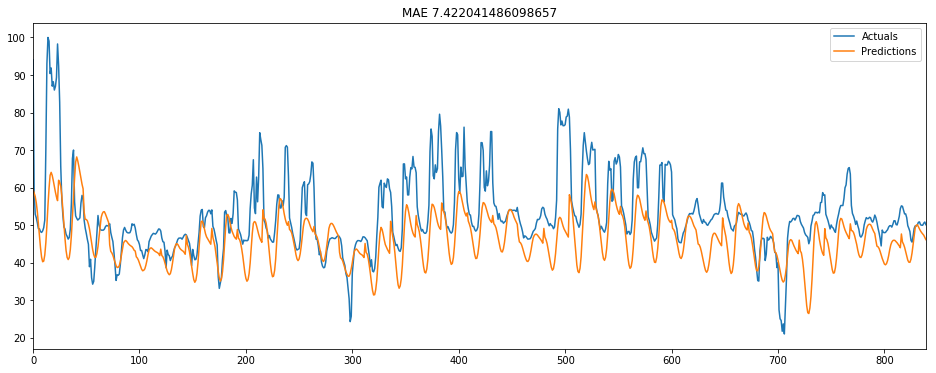

In [5]:
# batch size 6, epochs 50
combined_df_stripped = pd.read_pickle('combined_df_stripped.pickle')
test_nn('LSTM_encdec_L1L2_datasetcombined_df_stripped.pickle_sequence24-1553029113.h5',24,combined_df_stripped)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


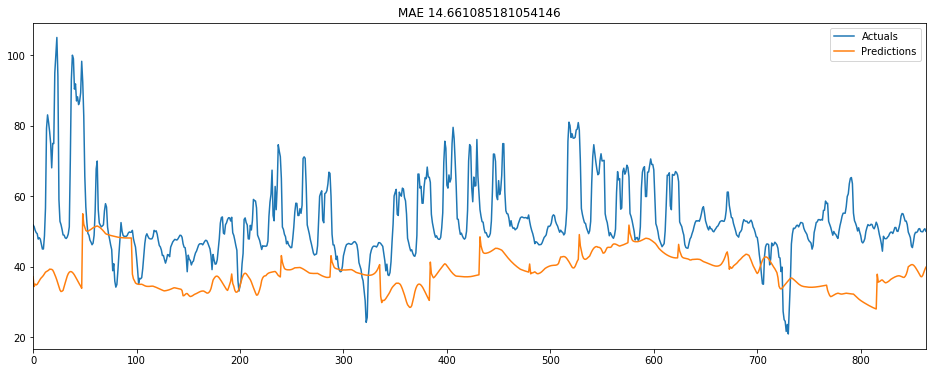

In [9]:
# batch size 12, epochs 50, predicting next 48 hours
combined_df_stripped = pd.read_pickle('combined_df_stripped.pickle')
test_nn('LSTM_encdec_L1L2_datasetcombined_df_stripped.pickle_sequence48-1553035435.h5',24*2,combined_df_stripped)

# Random Forest
Results for random forest. The random forest predicts based on all current features, so it does not predict a sequence (a 24-hour or a week forecast) into the future 
Used dataset: combined_df_engineered.pickle (dropped one-hot encoded features)

Variable: Spot T-168           Importance: 0.17
Variable: Spot T-336           Importance: 0.13
Variable: Spot T-504           Importance: 0.11
Variable: Spot MA              Importance: 0.05
Variable: Spot STD             Importance: 0.03
Variable: Spot Rolling Min     Importance: 0.03
Variable: Spot Rolling Max     Importance: 0.03
Variable: Helsinki Temperature Importance: 0.02
Variable: Jyvaskyla Temperature Importance: 0.02
Variable: Rovaniemi Temperature Importance: 0.02
Variable: Nuclear Power Production FI Importance: 0.02
Variable: Wind Power Production FI Importance: 0.02
Variable: FI-EE                Importance: 0.02
Variable: FI-RU                Importance: 0.02
Variable: Hydro Reservoir NO   Importance: 0.02
Variable: Hydro Reservoir SE   Importance: 0.02
Variable: Hydro Reservoir FI   Importance: 0.02
Variable: Coal                 Importance: 0.02
Variable: Oil                  Importance: 0.02
Variable: Finland Temperature  Importance: 0.02
Variable: ^OMXH25 Close    

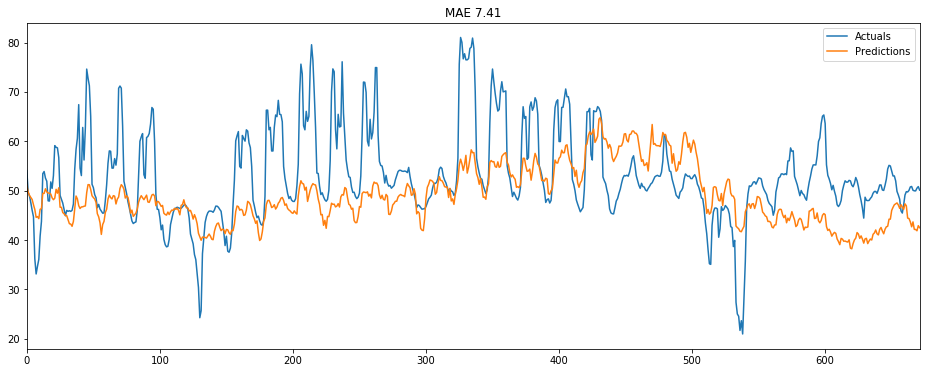

In [13]:
forest = joblib.load('../scripts/models/random_forest9.sav')
feature_names = combined_df.drop('Spot',axis=1).columns
predictions, labels = random_forest.predict_forest(forest,combined_df[-168*4:].drop(columns=combined_df.columns[27:43]))
test_result_df = pd.DataFrame(columns=['Actuals','Predictions'])
#print(mean_absolute_error(test_result_df['Actuals'],test_result_df['Predictions']))
test_result_df['Actuals'] = labels
test_result_df['Predictions'] = predictions
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 6))
test_result_df.plot(ax=axes)
axes.set_title(label=f"MAE {mean_absolute_error(test_result_df['Actuals'],test_result_df['Predictions']):.2f}")
random_forest.list_importances(forest,feature_names)
plt.show()

### New dataset

Index(['Spot', 'Helsinki Temperature', 'Jyvaskyla Temperature',
       'Rovaniemi Temperature', 'Consumption', 'Nuclear Power Production FI',
       'Wind Power Production FI', 'FI-EE', 'FI-NO', 'FI-RU',
       ...
       'Spot T-696', 'Spot MA T-696', 'Spot STD T-696',
       'Spot Rolling Min T-696', 'Spot Rolling Max T-696', 'Spot T-720',
       'Spot MA T-720', 'Spot STD T-720', 'Spot Rolling Min T-720',
       'Spot Rolling Max T-720'],
      dtype='object', length=204)
Variable: Spot T-24            Importance: 0.05
Variable: Spot T-168           Importance: 0.05
Variable: Spot T-336           Importance: 0.05
Variable:  Tuotantotasesähkön myyntihinta Importance: 0.04
Variable: Spot Rolling Max T-24 Importance: 0.04
Variable: yhat_upper           Importance: 0.03
Variable: yhat                 Importance: 0.03
Variable: Spot MA T-24         Importance: 0.03
Variable: Spot T-504           Importance: 0.03
Variable: Tuotantotasesähkön ostohinta Importance: 0.02
Variable: yhat_lower

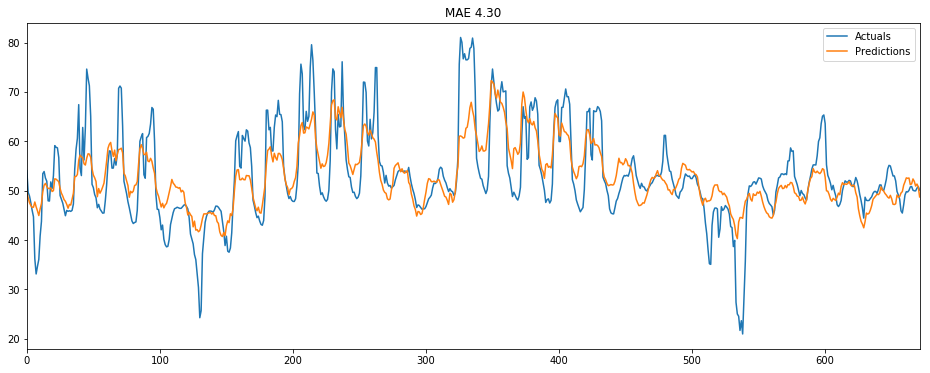

In [8]:
combined_df = pd.read_pickle('combined_df_engineered_T-24.pickle')
print(combined_df.columns)
forest = joblib.load('../scripts/models/random_forest10.sav')
feature_names = combined_df.drop('Spot',axis=1).columns
predictions, labels = random_forest.predict_forest(forest,combined_df[-168*4:])
test_result_df = pd.DataFrame(columns=['Actuals','Predictions'])
#print(mean_absolute_error(test_result_df['Actuals'],test_result_df['Predictions']))
test_result_df['Actuals'] = labels
test_result_df['Predictions'] = predictions
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 6))
test_result_df.plot(ax=axes)
axes.set_title(label=f"MAE {mean_absolute_error(test_result_df['Actuals'],test_result_df['Predictions']):.2f}")
random_forest.list_importances(forest,feature_names)
plt.show()

In [2]:
from sklearn.metrics import r2_score
def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

## Deleting features
Use permutative importance to delete features

In [14]:
from rfpimp import importances
combined_df = pd.read_pickle('combined_df_engineered_T-24.pickle')
forest = joblib.load('../scripts/models/random_forest10.sav')
test = combined_df[-168*4:]
perm_importances = importances(forest,test.drop(columns=['Spot']),test['Spot'])
#dataframe_drop = perm_importances['Importance'] < 0 # to file combined_df_perm_stripped.pickle
dataframe_drop = perm_importances['Importance'] < 0.0009 # to file combined_df_perm_stripped2.pickle
cols_to_drop = []
for row in dataframe_drop.iteritems():
    if row[1] == True:
        cols_to_drop.append(row[0])
combined_df.drop(columns=cols_to_drop).to_pickle('combined_df_perm_stripped2.pickle')

## Holt-Winters
Holt-Winters Exponential Smoothing method to create a forecasting model

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_df = combined_df['Spot']
train, test = hw_df['2013':'2017'], hw_df['2018']
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=24).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

#plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

In [3]:
combined_df = pd.read_pickle('combined_df_engineered_T-24.pickle')
for col in combined_df.columns:
    print(col)

Spot
Helsinki Temperature
Jyvaskyla Temperature
Rovaniemi Temperature
Consumption
Nuclear Power Production FI
Wind Power Production FI
FI-EE
FI-NO
FI-RU
FI-SE1
FI-SE3
Hydro Reservoir NO
Hydro Reservoir SE
Hydro Reservoir FI
Coal
Oil
^OMXH25 Close
FORTUM Close
^OMXSPI Close
^N100 Close
The price of comsumption imbalance electricity
Tuotantotasesähkön ostohinta
Sähkön tuotanto Suomessa
 Tuotantotasesähkön myyntihinta
hour_sin_time
hour_cos_time
weekday_sin_time
weekday_cos_time
month_sin_time
month_cos_time
day_sin_time
day_cos_time
Holiday
trend
yhat_lower
yhat_upper
trend_lower
trend_upper
additive_terms
additive_terms_lower
additive_terms_upper
daily
daily_lower
daily_upper
weekly
weekly_lower
weekly_upper
yearly
yearly_lower
yearly_upper
yhat
Total Exchange
Finland Temperature
Spot T-24
Spot MA T-24
Spot STD T-24
Spot Rolling Min T-24
Spot Rolling Max T-24
Spot T-48
Spot MA T-48
Spot STD T-48
Spot Rolling Min T-48
Spot Rolling Max T-48
Spot T-72
Spot MA T-72
Spot STD T-72
Spot Rollin